In [1]:
import numpy as np
import pandas as pd
np.random.seed(10)

from dreye import Domain, Signal, SignalContainer
from dreye.err import DreyeError
from dreye.constants import ureg

In [2]:
index = pd.Index([('a', 'b'), ('a', 'c'), ('b', 'c'), ('d', 'e')], names=['values', 'c'])

In [3]:
signal = Signal(
    np.random.random((10, 4)), # 1 or 2D
    domain=np.arange(10), 
    domain_axis=0, 
    units='volts', 
    domain_units='s', 
    attrs={'f':'b'},
    labels=index, # index-like
    name='signal',
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)
signal2 = signal.copy()
signal2.name = 'signal2'


In [4]:
signal.to_longframe().head()

,domain,labels,values,name,units,units_dimensionality,domain_units,domain_units_dimensionality,domain_min,domain_max,signal_min,signal_max,values_label,c,f
0,1.000000e-10,"(a, b)",0.771321,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b
1,1.000000e-10,"(a, c)",0.020752,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,c,b
2,1.000000e-10,"(b, c)",0.633648,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,b,c,b
3,1.000000e-10,"(d, e)",0.748804,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,d,e,b
4,1.000000e+00,"(a, b)",0.498507,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b


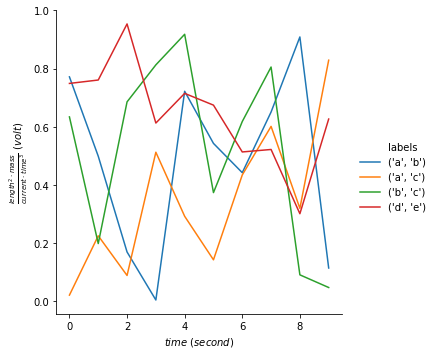

In [5]:
signal.relplot()

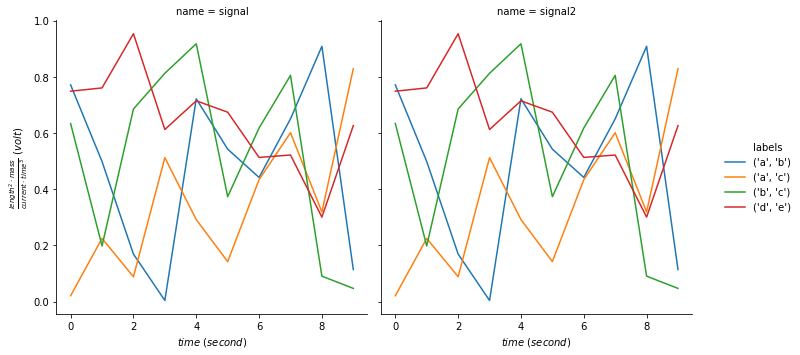

In [6]:
container = SignalContainer([signal, signal2])
container.relplot(col='name')

In [7]:
container.to_longframe().head()

,domain,labels,values,name,units,units_dimensionality,domain_units,domain_units_dimensionality,domain_min,domain_max,signal_min,signal_max,values_label,c,f
0,1.000000e-10,"(a, b)",0.771321,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b
1,1.000000e-10,"(a, c)",0.020752,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,c,b
2,1.000000e-10,"(b, c)",0.633648,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,b,c,b
3,1.000000e-10,"(d, e)",0.748804,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,d,e,b
4,1.000000e+00,"(a, b)",0.498507,signal,volt,[length] ** 2 * [mass] / [current] / [time] ** 3,second,[time],NaN,NaN,NaN,NaN,a,b,b


In [8]:
print(container['signal'])
print(container['signal'] == container[0])

Signal(
	 name=signal, 
	 labels=MultiIndex([('a', 'b'),
            ('a', 'c'),
            ('b', 'c'),
            ('d', 'e')],
           names=['values', 'c']), 
	 units=volt, 
	 shape=(10, 4), 
	 domain=Domain(start=0.0, end=9.0, interval=1.0, units=second), 
	 domain_axis=0 
 )
True


In [9]:
mean_container = container.mean(axis=1)

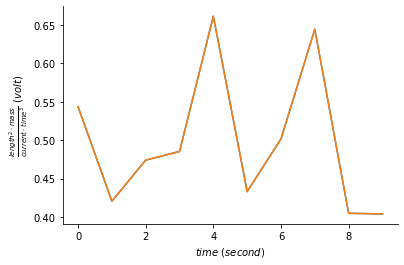

In [13]:
mean_container.plot()

In [15]:
est = signal.pca()
est.components_

array([[-0.43165968,  0.52773479, -0.71184869, -0.16863378],
       [ 0.75931284, -0.21364756, -0.5575316 , -0.25876099],
       [ 0.31964623,  0.66549284,  0.42383617, -0.52469846],
       [-0.36734211, -0.48266966,  0.05284749, -0.79328237]])

In [17]:
est = container.pca()
est.components_

array([[-0.30522949,  0.37316485, -0.50335304, -0.11924209, -0.30522949,
         0.37316485, -0.50335304, -0.11924209],
       [ 0.53691525, -0.15107164, -0.39423438, -0.18297165,  0.53691525,
        -0.15107164, -0.39423438, -0.18297165],
       [ 0.22602401,  0.4705745 ,  0.29969743, -0.37101784,  0.22602401,
         0.4705745 ,  0.29969743, -0.37101784],
       [-0.2597501 , -0.34129899,  0.03736882, -0.56093534, -0.2597501 ,
        -0.34129899,  0.03736882, -0.56093534],
       [ 0.2248193 ,  0.38767295,  0.54228461,  0.07136778, -0.2248193 ,
        -0.38767295, -0.54228461, -0.07136778],
       [ 0.08828214,  0.55394425, -0.43010494, -0.0190203 , -0.08828214,
        -0.55394425,  0.43010494,  0.0190203 ],
       [ 0.66408271, -0.20576165, -0.12894184,  0.00550376, -0.66408271,
         0.20576165,  0.12894184, -0.00550376],
       [-0.02562601, -0.02275073, -0.06565923,  0.7032173 ,  0.02562601,
         0.02275073,  0.06565923, -0.7032173 ]])

In [9]:
# attributes of signal

print(signal.attrs)
print(signal.dtype)
print(signal.units)
print(signal.domain)
print(signal.values)
print(signal.magnitude)
print(signal.boundaries)
print(signal.interpolator)
print(signal.interpolator_kwargs)
print(signal.labels)
print(signal.domain_axis)
print(signal.other_axis)
print(signal.other_len)
print(signal.domain_len)
print(signal.shape)
print(signal.size)
print(signal.ndim)
print(signal.integral)
print(signal.piecewise_integral)
print(signal.normalized_signal)
print(signal.piecewise_gradient)  # 
print(signal.gradient)  # numpy.gradient
print(signal.nanless)
print(signal.T)

{'f': 'b'}
<class 'numpy.float64'>
volt
Domain(start=0.0, end=9.0, interval=1.0, units=second)
[[0.77132064 0.02075195 0.63364823 0.74880388] [0.49850701 0.22479665 0.19806286 0.76053071] [0.16911084 0.08833981 0.68535982 0.95339335] [0.00394827 0.51219226 0.81262096 0.61252607] [0.72175532 0.29187607 0.91777412 0.71457578] [0.54254437 0.14217005 0.37334076 0.67413362] [0.44183317 0.43401399 0.61776698 0.51313824] [0.65039718 0.60103895 0.8052232  0.52164715] [0.90864888 0.31923609 0.09045935 0.30070006] [0.11398436 0.82868133 0.04689632 0.62628715]] volt
[[0.77132064 0.02075195 0.63364823 0.74880388]
 [0.49850701 0.22479665 0.19806286 0.76053071]
 [0.16911084 0.08833981 0.68535982 0.95339335]
 [0.00394827 0.51219226 0.81262096 0.61252607]
 [0.72175532 0.29187607 0.91777412 0.71457578]
 [0.54254437 0.14217005 0.37334076 0.67413362]
 [0.44183317 0.43401399 0.61776698 0.51313824]
 [0.65039718 0.60103895 0.8052232  0.52164715]
 [0.90864888 0.31923609 0.09045935 0.30070006]
 [0.11398436 0.

In [10]:
# methods of signal

print(signal(3.2)) # interpolation of single value
print(signal([3.2, 4.5])) # interpolation to multiple values
print(signal.to('mV')) # converting units
print(signal.enforce_uniformity()) # on domain
print(signal.window_filter(4, polyorder=3)) # savgol filter default polyorder 2 ## scipy.signal.savgol_filter
print(signal.cov())
print(signal.corr())
print(signal.cov(pandas=True))
print(signal.mean(axis=signal.other_axis), signal.sum())
print(signal.moveaxis(0, 1))

[0.14750968 0.46812902 0.83365159 0.63293601] volt
[[0.14750968 0.46812902 0.83365159 0.63293601] [0.63214984 0.21702306 0.64555744 0.6943547 ]] volt
[[771.32064327  20.75194936 633.64823493 748.80388254] [498.5070123  224.79664553 198.06286476 760.5307122 ] [169.11083656  88.33981417 685.35981837 953.39334619] [  3.94826633 512.19226339 812.62096165 612.52606683] [721.75531743 291.87606817 917.77412251 714.5757834 ] [542.54436801 142.1700476  373.34076005 674.13361507] [441.83317442 434.01399333 617.76697847 513.13824255] [650.39718193 601.0389534  805.22319683 521.64715239] [908.64888081 319.23608899  90.45934927 300.70005664] [113.98436186 828.68132631  46.89631939 626.28714831]] millivolt
[[0.77132064 0.02075195 0.63364823 0.74880388] [0.49850701 0.22479665 0.19806286 0.76053071] [0.16911084 0.08833981 0.68535982 0.95339335] [0.00394827 0.51219226 0.81262096 0.61252607] [0.72175532 0.29187607 0.91777412 0.71457578] [0.54254437 0.14217005 0.37334076 0.67413362] [0.44183317 0.4340139

In [5]:
other_signal1 = Signal(
    np.random.random((8, 4)), # 1 or 2D
    domain=np.arange(1, 9), 
    domain_axis=0, 
    units='volts', 
    domain_units='s', 
    attrs={'a':'b'},
    labels=['e', 'f', 'g', 'h'], # list-like
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)

other_signal2 = Signal(
    np.random.random((10, 4)), # 1 or 2D
    domain=np.arange(10, 20), 
    domain_axis=0, 
    units='volts', 
    domain_units='s', 
    attrs={'a':'b'},
    labels=['e', 'f', 'g', 'h'], # list-like
    interpolator_kwargs={'bounds_error':False, 'fill_value':0.5}
)

In [6]:
# method with other signal

print(signal.equalize_domains(other_signal1))
print(signal.other_concat(other_signal1))
print(signal.concat(other_signal1))
print(signal.domain_concat(other_signal2))
print(signal.append(other_signal2))
print(signal == other_signal1)
print(signal.dot(other_signal1))
print(signal.dot(other_signal1, pandas=True))

([[0.49850701 0.22479665 0.19806286 0.76053071] [0.16911084 0.08833981 0.68535982 0.95339335] [0.00394827 0.51219226 0.81262096 0.61252607] [0.72175532 0.29187607 0.91777412 0.71457578] [0.54254437 0.14217005 0.37334076 0.67413362] [0.44183317 0.43401399 0.61776698 0.51313824] [0.65039718 0.60103895 0.8052232  0.52164715] [0.90864888 0.31923609 0.09045935 0.30070006]] volt, [[0.54758616 0.819287   0.19894754 0.8568503 ] [0.35165264 0.75464769 0.29596171 0.88393648] [0.32551164 0.1650159  0.39252924 0.09346037] [0.82110566 0.15115202 0.38411445 0.94426071] [0.98762547 0.45630455 0.82612284 0.25137413] [0.59737165 0.90283176 0.53455795 0.59020136] [0.03928177 0.35718176 0.07961309 0.30545992] [0.33071931 0.7738303  0.03995921 0.42949218]] volt)
[[0.49850701 0.22479665 0.19806286 0.76053071 0.54758616 0.819287  0.19894754 0.8568503 ] [0.16911084 0.08833981 0.68535982 0.95339335 0.35165264 0.75464769  0.29596171 0.88393648] [0.00394827 0.51219226 0.81262096 0.61252607 0.32551164 0.1650159 

In [7]:
signal1 = Signal(np.arange(4), domain=np.arange(4), units='volts', domain_units='s')
signal2 = Signal(np.arange(4), domain=np.arange(4), units='V', domain_units='s')
print(signal1 == signal2)

True


In [8]:
signal.save('data/test_signal.json')

In [9]:
Signal.load('data/test_signal.json') == signal

True

In [10]:
# plottings

In [ ]:
matplotlib.pyplot.legend

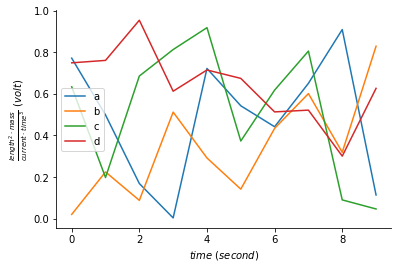

In [11]:
signal.plot(labels=True)

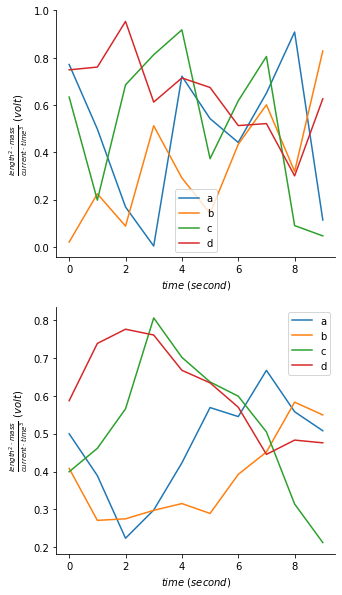

In [12]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(5, 10))

signal.plot(ax=axes[0], labels=True)
signal.window_filter(3, 'boxcar', extrapolate=True).plot(ax=axes[1], labels=True)

In [11]:
signal2 = Signal(signal, domain_min=2, domain_max=6, signal_min=0.5, signal_max=1)

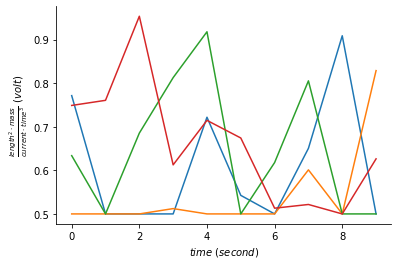

In [14]:
signal2.plot()

In [15]:
try:
    signal2(4)
except DreyeError as e:
    print(e)
    
print(signal2([2, 6]))

Interpolation domain above domain minimum.
[[0.5        0.5        0.68535982 0.95339335] [0.5        0.5        0.61776698 0.51313824]] volt


In [16]:
from dreye.core.spectrum import Spectrum

In [17]:
spectrum = Spectrum(
    np.arange(0, 100, 0.1), 
    np.linspace(300, 600, 1000)
)

In [18]:
spectrum2 = Spectrum(
    np.ones(100)*40, 
    np.linspace(300, 600, 100)
)

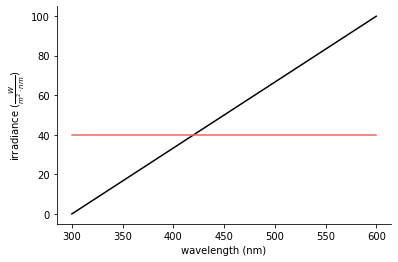

In [19]:
spectrum.plot()
spectrum2.plot(colors='tomato')

In [20]:
print(type(spectrum + spectrum2))
print(type(spectrum.T))
print(type(spectrum._expand_dims(0).moveaxis(0, 1)))
print(spectrum._expand_dims(0).shape)

<class 'dreye.core.spectrum.AbstractSpectrum'>
<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.Spectrum'>
(1, 1000)


In [21]:
type(spectrum.smooth)

/Users/matthias.christenson/Documents/dreye/dreye/core/signal.py:568: RuntimeWarning: chosen domain interval must be rounded down for filtering
  RuntimeWarning


dreye.core.spectrum.Spectrum

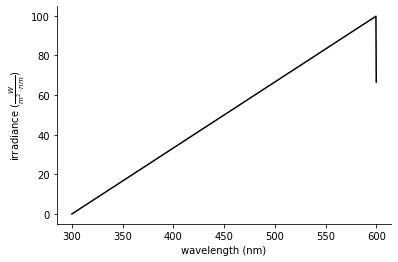

In [22]:
spectrum.smooth.plot()

In [23]:
print(type(spectrum.uE))
print(type(spectrum.irradiance))
print(type(spectrum.normalized_spectrum))

<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.Spectrum'>
<class 'dreye.core.spectrum.AbstractSpectrum'>


In [24]:
print(type(spectrum.concat(spectrum2)))
print(type(spectrum.integral))

<class 'dreye.core.spectrum.Spectrum'>
<class 'pint.quantity.build_quantity_class.<locals>.Quantity'>


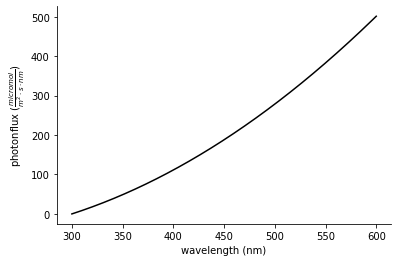

In [25]:
spectrum.uE.plot()

In [26]:
spectrum3 = Spectrum(
    np.ones(100)*40, 
    np.linspace(300, 600, 100), 
    units='uE'
)

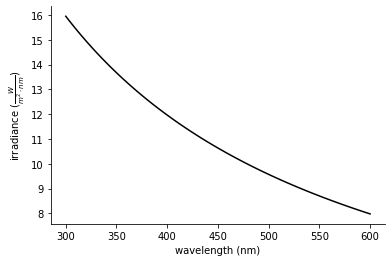

In [28]:
spectrum3.irradiance.plot()